In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors
import sklearn.preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import  metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
# Un de nos observations les plus importantes sera de dire que les données sont très peu équilibrées 
#ce qui perturbe le modèle

In [9]:
#DONNEES D'ENTRAINEMENT

In [10]:
train = pd.read_csv('exoTrain.csv')

In [11]:
train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [12]:
# 1 = non confirmés
# 2 = confirmés
#compteur
train['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [13]:
time_points = list(train.columns)
time_points.remove('LABEL')

In [14]:
def flux_graph(row,train):
    plt.figure(figsize=(15,5))
    line = train[time_points].iloc[row]
    plt.plot([int(i.replace('FLUX.', '')) for i in line.index], line)
    plt.xlabel('t')
    plt.ylabel('flux')
    plt.show()

confirmed = train[train['LABEL'] == 2].head(5).index
notConfirmed = train[train['LABEL'] == 1].head(5).index

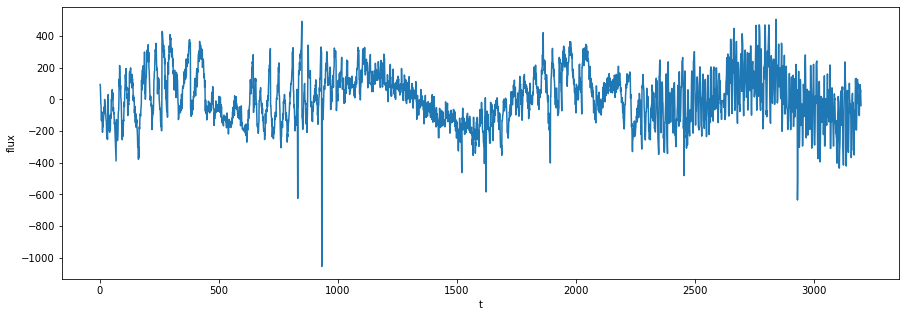

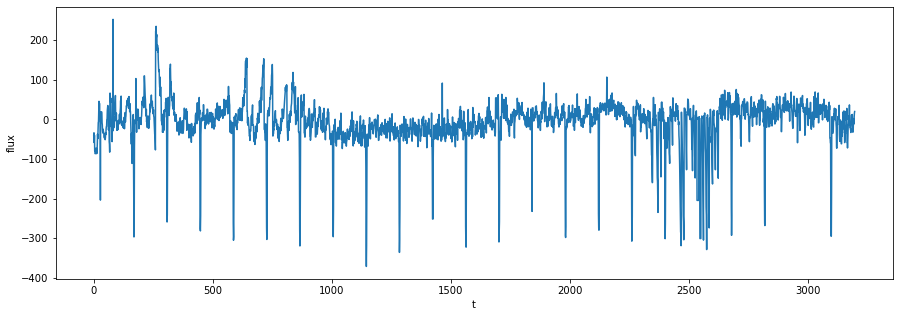

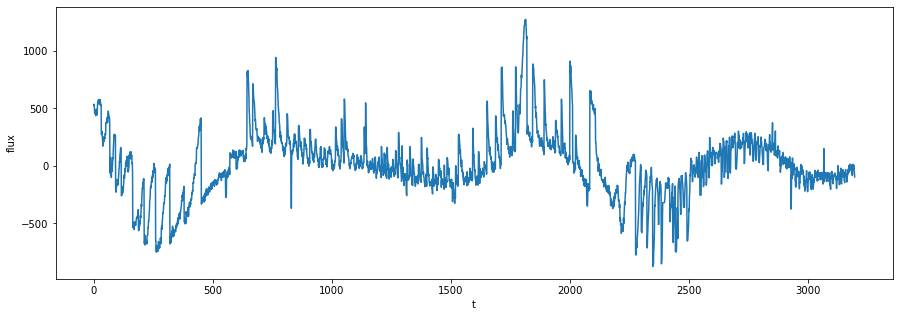

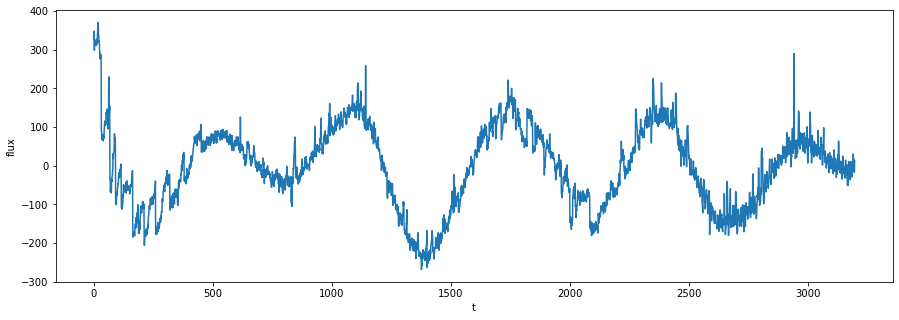

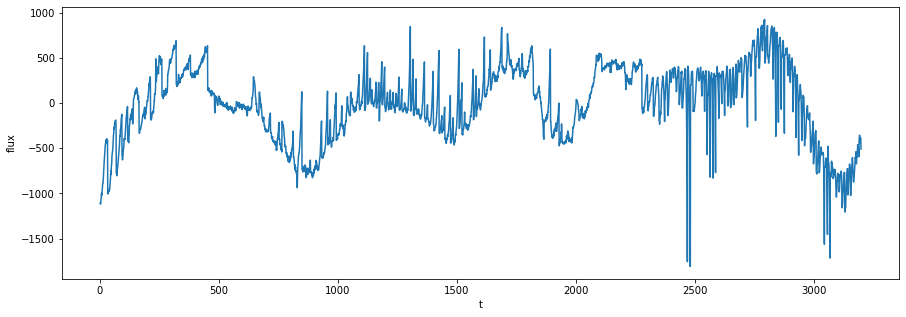

In [15]:
#flux des 2
for row in confirmed:
    flux_graph(row,train)


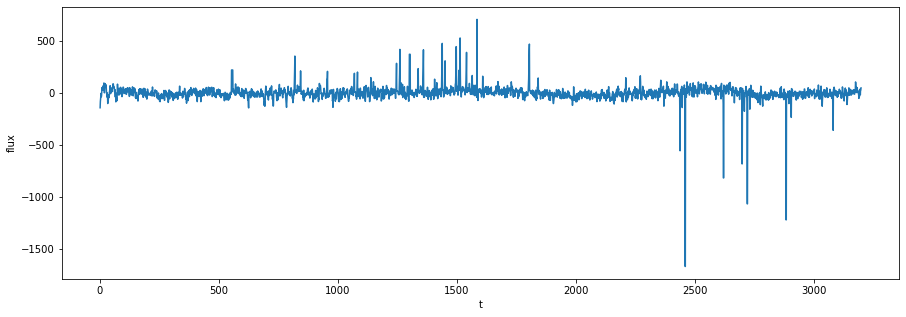

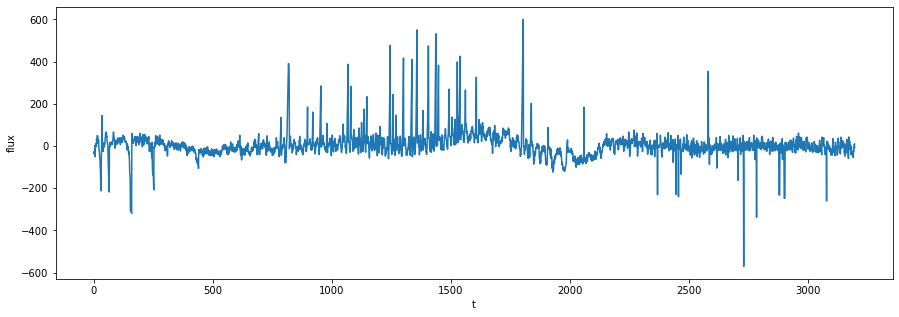

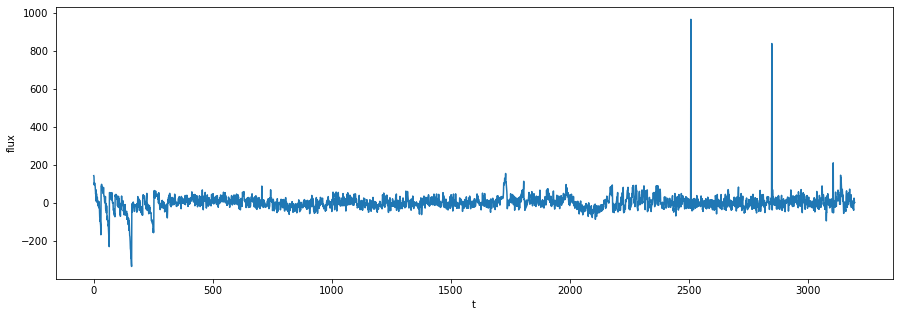

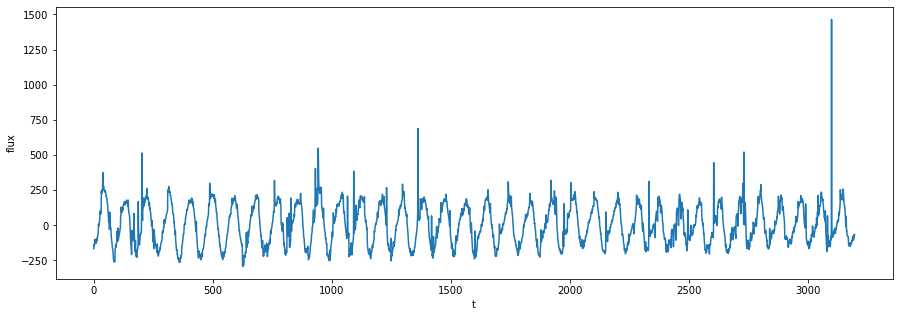

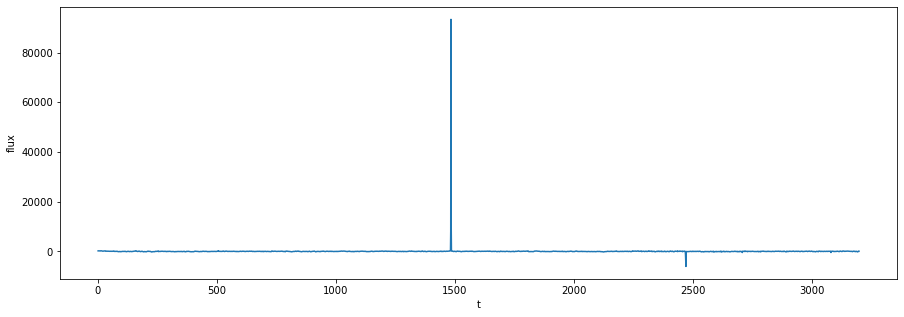

In [16]:
#flux des 1
for row in notConfirmed:
    flux_graph(row,train)

In [17]:
#étoiles avec exoplanète

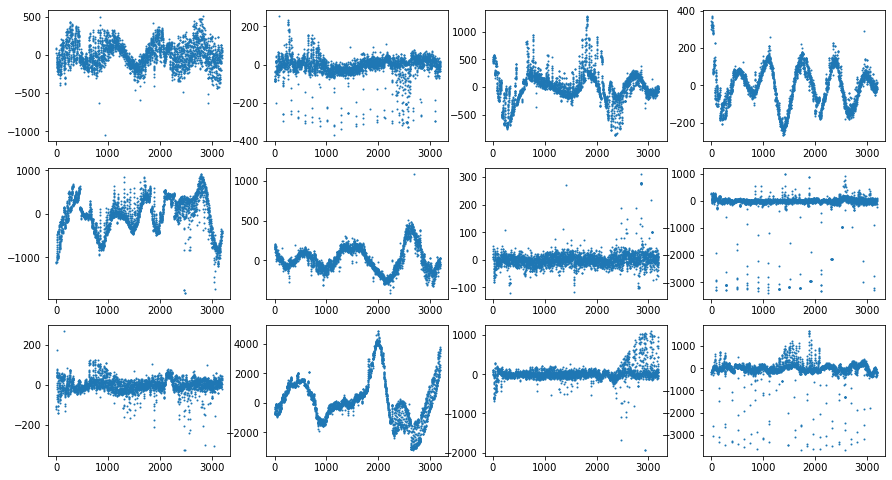

In [18]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 2].iloc[i,1:],s=1)

In [19]:
#etoiles sans exoplanetes

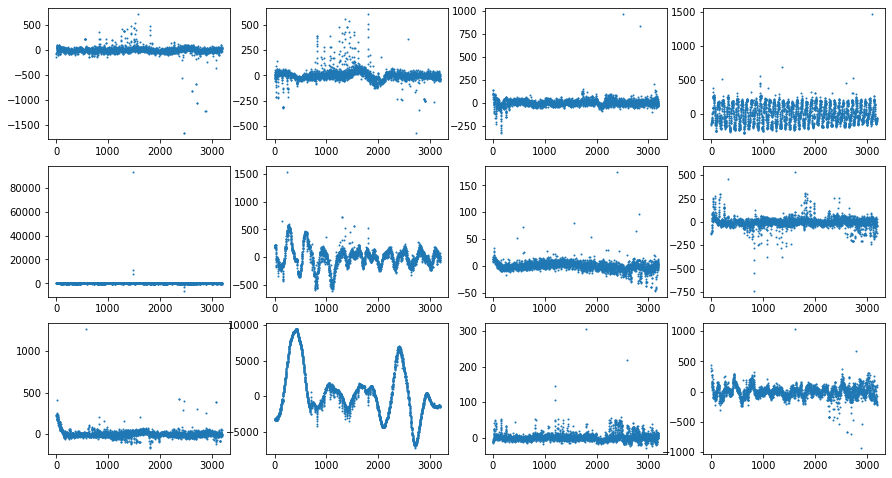

In [20]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL']==1].iloc[i,1:],s=1)

In [21]:
features_train = train.transpose()[1:].transpose()

In [22]:
features_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [23]:
label_train = train.transpose()[:1]

In [24]:
label_train

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
flux_train = train.transpose()[1:]

In [26]:
flux_train

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
FLUX.5,-39.56,-79.31,456.45,317.74,-1057.55,188.46,37.64,180.98,-61.46,-453.09,...,78.42,-1.56,338.94,-75.40,236.89,-68.00,755.11,280.73,1.66,249.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,...,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,...,3.80,-10.69,86.29,-20.12,-46.29,-24.45,38.03,65.73,-4.65,-41.31
FLUX.3195,61.42,6.46,-28.91,-17.31,-384.65,-41.63,-11.77,-10.62,26.94,3648.34,...,16.33,-9.54,13.06,-14.41,-3.08,-17.00,100.28,88.42,-14.55,-16.72
FLUX.3196,5.08,16.00,-70.02,-17.35,-411.79,-52.90,-9.25,-112.02,34.08,3671.97,...,27.35,-2.48,161.22,-43.35,-28.43,3.23,-45.64,79.07,-6.41,-14.09


In [27]:
#PREPARATION DES DONNEES POUR MODELISATION

In [28]:
# changement du label : 1 pour succès 0 pour échec

In [29]:
label_pro = lambda x: 1 if x == 2 else 0

    
train2 = train.copy()
train2['LABEL'] = train2['LABEL'].apply(label_pro)

train2['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train2.drop('LABEL', axis = 1), 
                                                    train2['LABEL'], 
                                                    test_size=0.3,
                                                   random_state = 101)

In [31]:
X_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
3450,69.71,62.27,91.86,98.29,114.33,129.02,121.84,125.89,179.57,149.34,...,-214.00,-221.34,-243.18,-339.31,-335.50,-351.29,-280.55,-148.22,-164.29,-157.47
797,-54.07,-24.89,-36.93,-40.18,-30.35,-25.98,-20.94,-17.27,-17.69,3.35,...,-168.98,-194.36,-251.76,-307.72,-328.28,-323.71,-341.69,-274.42,-235.08,-190.08
1044,-513.07,-525.15,-491.53,-473.93,-452.07,-436.59,-428.14,-423.67,-393.03,-414.25,...,-52.01,-33.76,19.96,-8.62,1.66,12.24,154.75,156.47,149.93,67.88
2650,69.42,67.61,49.01,70.20,84.53,56.62,55.45,38.50,21.87,43.06,...,-3.22,15.85,26.53,29.42,49.29,39.40,-3.88,-54.66,-50.85,-21.02
1508,32.50,-41.81,-41.19,19.31,-33.91,-41.56,6.81,-5.28,28.09,-32.78,...,-75.53,-109.09,-198.97,-198.94,-184.56,-100.31,54.87,-73.56,-36.72,-78.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,-4.68,-10.51,-16.33,-5.17,-9.69,-15.02,7.16,-8.00,1.65,-1.20,...,-19.90,-5.13,-7.04,5.64,-6.59,6.08,-0.94,4.68,1.69,13.81
599,487.21,467.05,455.09,454.44,448.08,451.49,435.94,425.55,437.47,419.21,...,10.44,29.39,18.93,24.88,22.77,35.94,23.23,33.83,36.40,25.36
1361,-29.15,-23.10,20.59,-29.15,-26.05,-22.46,-33.57,-40.13,-41.05,-78.66,...,-45.43,-40.24,-41.80,-41.69,-86.19,-120.21,-34.19,-26.10,-42.24,-13.32
1547,2.41,-1.47,-9.82,-2.27,-7.85,-4.28,-5.92,-6.51,-5.66,-3.15,...,-4.81,-0.24,-0.78,-9.32,-2.11,-4.78,0.61,-12.19,-4.51,-10.63


In [32]:
X_test

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
1689,-195.49,-185.63,-185.85,-189.09,-188.17,-177.77,-188.17,-164.83,-157.64,-167.07,...,2.86,5.18,1.35,6.19,8.96,-26.02,49.19,26.14,27.52,8.45
4111,-210.17,-271.79,-263.47,-266.98,-257.78,-265.40,-219.18,-189.80,-144.27,-191.96,...,33.41,270.76,90.81,65.54,76.74,37.25,6.74,20.00,20.22,14.17
2264,-1.27,-8.46,6.36,11.72,-6.01,-17.57,-4.63,-5.66,1.10,0.51,...,4.08,-12.01,2.84,8.81,6.36,1.76,14.17,26.07,31.59,31.74
176,-28.27,-26.66,-33.05,-22.03,-16.34,-3.05,-7.27,5.58,19.62,14.03,...,63.90,49.37,54.57,48.92,34.98,33.17,16.52,-0.70,-11.33,-10.14
748,-96.65,-61.08,-71.96,-43.73,-2.68,-2.90,64.14,62.04,48.11,77.69,...,65.26,61.87,96.54,94.77,80.21,96.88,76.63,76.97,79.49,101.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,2.13,1.87,-4.16,0.87,-3.38,0.21,0.32,-3.25,-4.00,-2.68,...,0.97,1.95,1.57,1.28,2.63,-2.64,-1.07,-6.52,-1.60,-4.24
2094,7.69,0.24,2.85,4.16,21.55,0.87,8.17,-3.70,-0.27,-10.32,...,7.16,7.25,10.85,1.15,7.52,4.80,11.78,16.02,12.61,8.17
396,-156.16,-260.34,-273.28,-306.91,-260.66,-167.38,-117.38,-62.19,-110.16,-72.47,...,154.78,58.84,-46.91,-134.47,-14.28,130.78,162.66,209.81,175.81,139.69
3760,-209.22,-210.58,-161.92,-116.39,-109.06,-97.69,-31.53,9.98,-3.30,-15.45,...,4.67,-13.58,-61.08,-73.45,-80.36,-135.77,-10.88,-13.08,-58.58,-14.81


In [33]:
y_train

3450    0
797     0
1044    0
2650    0
1508    0
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: LABEL, Length: 3560, dtype: int64

In [34]:
y_test

1689    0
4111    0
2264    0
176     0
748     0
       ..
5075    0
2094    0
396     0
3760    0
4402    0
Name: LABEL, Length: 1527, dtype: int64

In [35]:
#SVC

In [38]:
# exemple de fonction SVC qui a l'air bien


def linearSVC(X_train,y_train,test_X,y_test):
    svm=LinearSVC()
    svm.fit(X_train,y_train)
    prediction_svm=svm.predict(X_test)
    print("-------------------------------------------")
    print("Linear SVClassifier")
    print("")
    print(classification_report(y_test,prediction_svm))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(svm,X_test,y_test,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(svm,X_test, y_test,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(svm, X_test, y_test,ax=ax)
    f1=metrics.f1_score(y_test, prediction_svm,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1


C:\Users\egall\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           0       1.00      0.73      0.84      1519
           1       0.01      0.75      0.03         8

    accuracy                           0.73      1527
   macro avg       0.51      0.74      0.43      1527
weighted avg       0.99      0.73      0.84      1527



ValueError: pos_label=2 is not a valid label: array([0, 1], dtype=int64)

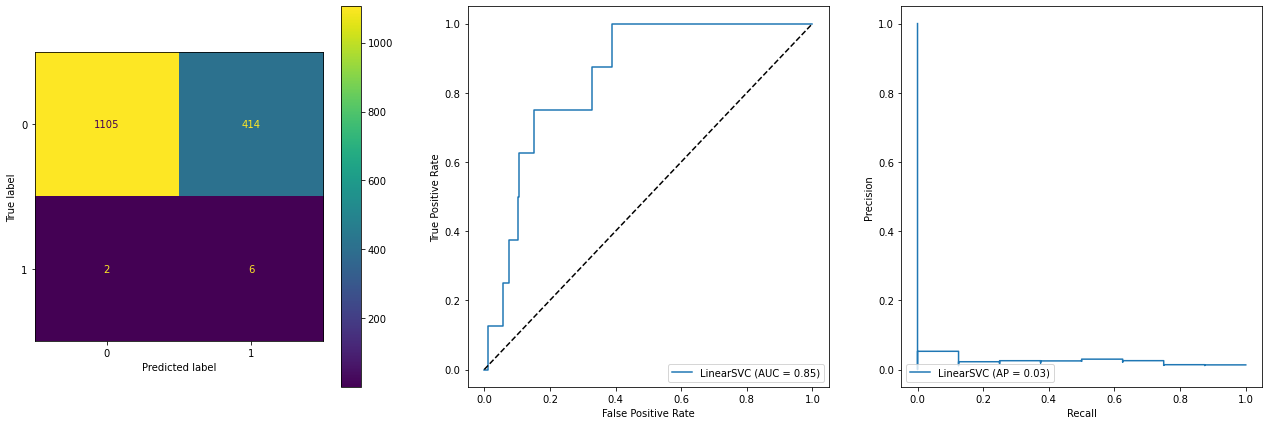

In [39]:
linearSVC(X_train,y_train,X_test,y_test)

In [ ]:
# il faudrait fit les données ici

In [ ]:
#PCA

In [40]:
varianceExplained=0.95
preProc = sklearn.decomposition.PCA(n_components=varianceExplained,svd_solver='full') #full? 

In [41]:
X_train = features_train
Y_train = label_train
X_test = features_test
Y_test = label_test

NameError: name 'features_test' is not defined

In [ ]:
preProc.fit(X_train)

In [ ]:
nbComp=preProc.n_components_
print(nbComp)

In [ ]:
CumulativeExplainedVariance = np.cumsum(preProc.explained_variance_ratio_)
plt.plot(CumulativeExplainedVariance)
plt.ylim([0,1])

In [ ]:
#Essai PCA 2 composantes
from sklearn.preprocessing import StandardScaler

In [ ]:
preProcBis = sklearn.decomposition.PCA(n_components=2,svd_solver='full') 
preProcBis.fit(X_train)

In [ ]:
constSTD = StandardScaler().fit_transform(X_train)
constPCA = preProcBis.fit_transform(constSTD)

In [ ]:
labels = train.iloc[:,0]
plt.figure(figsize=(16, 5))
for lab, col in zip((1, 2),
                        ('blue', 'red')):
        plt.scatter(constPCA[labels==lab, 0],
                    constPCA[labels==lab, 1],
                    label=lab,
                    c=col)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.tight_layout()
plt.show()

In [ ]:
# => 2 composantes ne sont pas suffisante pour que les données soient linérairement séparables



In [ ]:
#SVM

In [ ]:
clf = sklearn.svm.SVC(C=1,kernel='linear')

In [ ]:
constPCA = preProc.fit_transform(constSTD)

In [ ]:
clf.fit(constPCA,np.squeeze(np.asarray(label_train))) #infini, paramètres à revoir surement

In [ ]:
y_pred = clf.predict(X_test)
print("training score:",clf.score(X_train,Y_train))
print("validation score:",clf.score(X_test,Y_test))

In [ ]:
#VALIDATION

In [ ]:
test = pd.read_csv('exoTest.csv')

In [ ]:
test

In [ ]:
#DONNEES TEST

In [ ]:
features_test = test.transpose()[1:].transpose()

In [ ]:
features_test

In [ ]:
# LABELS /  1 : Non confirmé  /  2 : Confirmé  

In [ ]:
label_test = test.transpose()[:1]

In [ ]:
label_test

In [ ]:
flux_test = test.transpose()[1:]

In [ ]:
flux_test

In [ ]:
# 1 = non confirmés
# 2 = confirmés
#compteur
test['LABEL'].value_counts()